In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

In [3]:
train_in = np.loadtxt('./Datasets/train_in.csv', 
                  delimiter=',',  
                  skiprows=0,      
                  dtype=float)       
test_in = np.loadtxt('./Datasets/test_in.csv', 
                  delimiter=',',   
                  skiprows=0,      
                  dtype=float)       
train_out = np.loadtxt('./Datasets/train_out.csv', 
                  delimiter=',',  
                  skiprows=0,      
                  dtype=float)       
test_out = np.loadtxt('./Datasets/test_out.csv', 
                  delimiter=',',   
                  skiprows=0,      
                  dtype=float)       

In [4]:
X_train, X_val, y_train, y_val = train_test_split(train_in, train_out, train_size=0.8, random_state=0)
X_test = test_in
y_test = test_out
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
print('Inputs_train', )

(1365, 256) (342, 256) (1365,) (342,)
Inputs_train


In [5]:
# input dataset
def preprocessing(datasets):
    return np.hstack((datasets, np.ones(len(datasets)).reshape(len(datasets),1)))

In [6]:
def get_dummies(list, array):
    for i, each in zip(list, array):
        each[int(i)] = 1
    return array

In [7]:
# sigmoid function 
def sig(x):
    return (1/(1+np.exp(-x)))

def sig_prime(x):
    return (x * (1 - x))

In [8]:
Len_train = len(X_train)
Len_val = len(X_val)
Len_test = len(X_test)

X_train = preprocessing(X_train)
X_val = preprocessing(X_val)
X_test = preprocessing(X_test)

y_train_dummy = np.zeros(Len_train*10).reshape(Len_train, 10)
y_train_dummy = get_dummies(y_train, y_train_dummy)
y_val_dummy = np.zeros(Len_val*10).reshape(Len_val, 10)
y_val_dummy = get_dummies(y_val, y_val_dummy)
y_test_dummy = np.zeros(Len_test*10).reshape(Len_test, 10)
y_test_dummy = get_dummies(y_test, y_test_dummy)

In [9]:
kf = KFold(n_splits=5)

kfold_index_list = []

for cv_index_train, cv_index_test in kf.split(X_train):
    kfold_index_list.append((cv_index_train, cv_index_test))

In [10]:
def training(lr, w, x, y_dummy):
    for iter in range(1000):
        for i in range(len(x)):
            y_hat = sig(np.dot(x[i], w))
            diff = y_dummy[i] - y_hat
            x_re = x[i].reshape(257,1)
            # print(y_hat)
            sp = sig_prime(y_hat) * diff
            w += lr * x_re * sp

        if iter % 10 == 0 :
            arg_y_hat = np.argmax(sig(np.dot(x, w)), axis=1)
            arg_y_dummy = np.argmax(y_dummy, axis=1)
            arg_diff = abs(arg_y_dummy - arg_y_hat)
            acc = (len(y_dummy)-np.sum(arg_diff>0))/len(y_dummy)
            # print(sum(arg_diff))
        if acc > 0.97:
            print('iter', iter)
            break
    return w

In [11]:
w0 = np.random.normal(loc=0.0, scale=1.0, size=(257, 10))

In [11]:
# np.random.seed(2022)
# w0 = np.random.normal(1,-1,loc=0.0, scale=1.0, size=(257, 10))
# lr = 0.3
# w = training(lr, w0, X_train, y_train_dummy)

In [12]:
def predict(lr, w, train_x, y_train_dummy):
    y_hat = sig(np.dot(train_x, w))
    return np.argmax(y_hat, axis=1)

In [13]:
W_experiments = np.zeros(257*10*4).reshape(4, 257,10)


In [14]:
def generate_w0(sections):
    np.random.seed(2022)
    W_experiments = np.zeros(257*10*len(sections)).reshape(len(sections), 257,10)
    index = 0
    for i in sections:
        # print(i[0], i[1])
        W_experiments[index] = np.random.uniform(i[0], i[1], size=(257,10))
        index += 1
    return W_experiments

In [15]:
lr = 0.3

In [16]:
def generate_acc(w):
    pred_val = predict(lr, w, X_val, y_val_dummy)
    acc_val = accuracy_score(y_val, pred_val)

    pred_test = predict(lr, w, X_test, y_test_dummy)
    acc_test = accuracy_score(y_test, pred_test)

    return acc_val, acc_test

In [45]:
# normal weights
w_list = []
results = []
w_list.clear()
results.clear()
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=0.3, size=(257, 10))
w = training(lr, w0, X_train, y_train_dummy)

pred_train = predict(lr, w, X_train, y_train_dummy)
acc_train = accuracy_score(y_train, pred_train)
acc_val, acc_test = generate_acc(w)

w_list.append(w)

print("Training with weights section: ", 'Completely random')
print("Accuracy train: ", acc_train, "Accuracy validation", acc_val, "Accuracy test", acc_test)

iter 160
Training with weights section:  Completely random
Accuracy train:  0.9721611721611721 Accuracy validation 0.9502923976608187 Accuracy test 0.89


In [46]:
# normal weights
w_list = []
results = []
w_list.clear()
results.clear()
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=0.3, size=(257, 10))
w = training(lr, w0, X_train, y_train_dummy)

pred_train = predict(lr, w, X_train, y_train_dummy)
acc_train = accuracy_score(y_train, pred_train)
acc_val, acc_test = generate_acc(w)

w_list.append(w)

print("Training with weights section: ", 'Completely random')
print("Accuracy train: ", acc_train, "Accuracy validation", acc_val, "Accuracy test", acc_test)

iter 160
Training with weights section:  Completely random
Accuracy train:  0.9721611721611721 Accuracy validation 0.9502923976608187 Accuracy test 0.89


In [47]:
# normal weights
w_list = []
results = []
w_list.clear()
results.clear()
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=0.5, size=(257, 10))
w = training(lr, w0, X_train, y_train_dummy)

pred_train = predict(lr, w, X_train, y_train_dummy)
acc_train = accuracy_score(y_train, pred_train)
acc_val, acc_test = generate_acc(w)

w_list.append(w)

print("Training with weights section: ", 'Completely random')
print("Accuracy train: ", acc_train, "Accuracy validation", acc_val, "Accuracy test", acc_test)

Training with weights section:  Completely random
Accuracy train:  0.8974358974358975 Accuracy validation 0.8888888888888888 Accuracy test 0.811


In [48]:
# normal weights
w_list = []
results = []
w_list.clear()
results.clear()
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=0.1, size=(257, 10))
w = training(lr, w0, X_train, y_train_dummy)

pred_train = predict(lr, w, X_train, y_train_dummy)
acc_train = accuracy_score(y_train, pred_train)
acc_val, acc_test = generate_acc(w)

w_list.append(w)

print("Training with weights section: ", 'Completely random')
print("Accuracy train: ", acc_train, "Accuracy validation", acc_val, "Accuracy test", acc_test)

iter 20
Training with weights section:  Completely random
Accuracy train:  0.9714285714285714 Accuracy validation 0.9532163742690059 Accuracy test 0.888


In [50]:
# normal weights
w_list = []
results = []
w_list.clear()
results.clear()
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=1, size=(257, 10))
w = training(lr, w0, X_train, y_train_dummy)

pred_train = predict(lr, w, X_train, y_train_dummy)
acc_train = accuracy_score(y_train, pred_train)
acc_val, acc_test = generate_acc(w)

w_list.append(w)

print("Training with weights section: ", 'Completely random')
print("Accuracy train: ", acc_train, "Accuracy validation", acc_val, "Accuracy test", acc_test)

Training with weights section:  Completely random
Accuracy train:  0.7230769230769231 Accuracy validation 0.7426900584795322 Accuracy test 0.657


In [34]:
# np.random.seed(2022)
# w0 = np.random.uniform(-0.3,0.3,size=(257,10))
w_list = []
results = []
w_list.clear()
results.clear()
np.random.seed(2022)
sections = [(-1, 1), (-0.5, 0.5), (-0.3, 0.3), (-0.1, 0.1)]
lr = 0.3
W_experiments = generate_w0(sections)

In [36]:
for w0_index in range(len(sections)):
    print(w0_index)
    w0 = W_experiments[w0_index]
    w = training(lr, w0, X_train, y_train_dummy)
    
    pred_train = predict(lr, w, X_train, y_train_dummy)
    acc_train = accuracy_score(y_train, pred_train)
    acc_val, acc_test = generate_acc(w)

    w_list.append(w)
    results.append((acc_train, acc_val, acc_test))
for i in range(len(sections)):
    acc, acc_val, acc_test = results[i]
    print("Training with weights section: ", sections[i])
    print("Accuracy train: ", acc, "Accuracy validation", acc_val, "Accuracy test", acc_test)



0
2242
1278
1309
1268
1270
1241
1213
1212
1213
1246
1241
1231
1213
1237
1241
1216
1202
1188
1189
1176
1165
1164
1159
1154
1158
1158
1158
1159
1163
1163
1160
1157
1157
1157
1155
1148
1144
1138
1145
1150
1150
1150
1150
1148
1148
1148
1147
1147
1150
1150
1166
1168
1173
1173
1171
1173
1173
1173
1173
1173
1176
1176
1176
1174
1174
1174
1177
1178
1177
1177
1177
1177
1177
1177
1177
1173
1172
1168
1170
1170
1170
1186
1176
1172
1173
1173
1174
1174
1177
1177
1177
1177
1175
1174
1174
1174
1174
1172
1172
1175
1
2554
1172
1233
1220
1229
651
618
619
650
656
654
641
635
635
628
616
514
142
124
iter 180
2
513
170
156
145
139
142
iter 50
3
477
142
154
129
iter 30
Training with weights section:  (-1, 1)
Accuracy train:  0.7677655677655678 Accuracy validation 0.7573099415204678 Accuracy test 0.695
Training with weights section:  (-0.5, 0.5)
Accuracy train:  0.9736263736263736 Accuracy validation 0.956140350877193 Accuracy test 0.887
Training with weights section:  (-0.3, 0.3)
Accuracy train:  0.9706959706

In [19]:
w0 = np.zeros(257*10).reshape(257, 10)
w = training(lr, w0, X_train, y_train_dummy)

pred_train = predict(lr, w, X_train, y_train_dummy)
acc_train = accuracy_score(y_train, pred_train)
acc_val, acc_test = generate_acc(w)

w_list.append(w)

print("Training with weights section: ", '0, 0')
print("Accuracy train: ", acc_train, "Accuracy validation", acc_val, "Accuracy test", acc_test)

658
140
146
151
135
Training with weights section:  0, 0
Accuracy train:  0.9714285714285714 Accuracy validation 0.9619883040935673 Accuracy test 0.876


In [51]:
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=0.3, size=(257, 10))
lr = 0.3
w_list.clear()
results.clear()
for i in range(5):
    w = training(lr, w0, X_train[kfold_index_list[i][0]], y_train_dummy[kfold_index_list[i][0]])

    pred_train = predict(lr, w, X_train[kfold_index_list[i][1]], y_train_dummy[kfold_index_list[i][1]])
    acc_train = accuracy_score(y_train[kfold_index_list[i][1]], pred_train)

    pred_val = predict(lr, w, X_val, y_val_dummy)
    acc_val = accuracy_score(y_val, pred_val)

    pred_test = predict(lr, w, X_test, y_test_dummy)
    acc_test = accuracy_score(y_test, pred_test)

    w_list.append(w)
    results.append((acc_train, acc_val, acc_test))

for acc, acc_val, acc_test in results:
    print("Accuracy train: ", acc, "Accuracy validation", acc_val, "Accuracy test", acc_test)


iter 80
iter 0
iter 0
iter 10
iter 90
Accuracy train:  0.945054945054945 Accuracy validation 0.956140350877193 Accuracy test 0.883
Accuracy train:  0.9560439560439561 Accuracy validation 0.956140350877193 Accuracy test 0.885
Accuracy train:  0.9706959706959707 Accuracy validation 0.9532163742690059 Accuracy test 0.883
Accuracy train:  0.9743589743589743 Accuracy validation 0.9532163742690059 Accuracy test 0.887
Accuracy train:  0.9816849816849816 Accuracy validation 0.9444444444444444 Accuracy test 0.888


iter 70


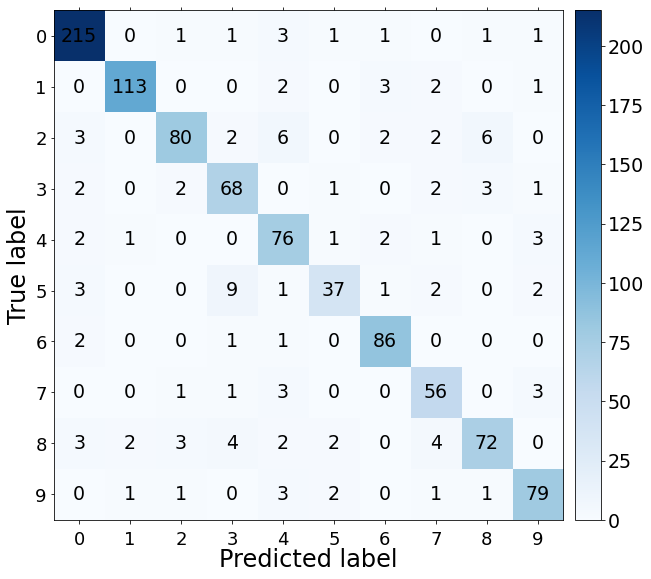

In [20]:
## confusion Test
np.random.seed(2022)
w0 = np.random.uniform(-0.3, 0.3, size=(257,10))
w = training(lr, w0, X_train, y_train_dummy)

plt.rc('figure',figsize=(11,11)) 
cm = confusion_matrix(y_test, predict(lr, w, X_test, y_test_dummy)) 
plt.matshow(cm,cmap=plt.cm.Blues) 
cm_x_ticks=[0,1,2,3,4,5,6,7,8,9] 
for i in range(cm.shape[0]): 
  for j in range(cm.shape[1]): 
    plt.text(x=j, y=i, s=cm[i, j], 
fontsize=19,ha='center',va='center') 
my_x_ticks = [0,1,2,3,4,5,6,7,8,9] 
my_y_ticks = [0,1,2,3,4,5,6,7,8,9] 
plt.xticks(my_x_ticks, size=18, verticalalignment='bottom', y=-0.07) 
plt.yticks(my_y_ticks, size=18) 
plt.xlabel('Predicted label',fontdict={'fontsize':24}, labelpad=28 ) 
plt.ylabel('True label',fontdict={'fontsize':24})
plt.rcParams['font.size'] = 19
plt.colorbar(pad=0.02,shrink=0.83)

In [17]:
# ## confusion Test
# np.random.seed(2022)
# w0 = np.random.uniform(-0.3, 0.3, size=(257,10))
# w = training(lr, w0, X_train, y_train_dummy)
# confusion_matrix(predict(lr, w, X_test, y_test_dummy), y_test)

iter 70


array([[215,   0,   3,   2,   2,   3,   2,   0,   3,   0],
       [  0, 113,   0,   0,   1,   0,   0,   0,   2,   1],
       [  1,   0,  80,   2,   0,   0,   0,   1,   3,   1],
       [  1,   0,   2,  68,   0,   9,   1,   1,   4,   0],
       [  3,   2,   6,   0,  76,   1,   1,   3,   2,   3],
       [  1,   0,   0,   1,   1,  37,   0,   0,   2,   2],
       [  1,   3,   2,   0,   2,   1,  86,   0,   0,   0],
       [  0,   2,   2,   2,   1,   2,   0,  56,   4,   1],
       [  1,   0,   6,   3,   0,   0,   0,   0,  72,   1],
       [  1,   1,   0,   1,   3,   2,   0,   3,   0,  79]], dtype=int64)

In [22]:
# w0 = np.random.random((257,10))
# lr = 0.3
# w = training(lr, w0, X_train, y_train_dummy)

In [23]:
test_in_sort = np.hstack((test_in, test_out.reshape(1000,1)))
test_in_sort = test_in_sort[test_in_sort[:,-1].argsort()]
test_in_sort[:,-1] = 1
test_out_sort = sorted(test_out)

In [24]:
s = 0
index_test = []
for i in range(len(test_out_sort)):
    if test_out_sort[i] > s:
        index_test.append(i-1)
        s += 1
index_test.append(1000)

In [25]:
index_test

[223, 344, 445, 524, 610, 665, 755, 819, 911, 1000]

In [26]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [27]:
knn_model = knn()
model_knn = knn_model.fit(train_in,train_out)
test_pred_knn = model_knn.predict(test_in)

In [28]:
test_pred_knn.shape

(1000,)

## Compare

In [53]:
np.random.seed(2022)
w0 = np.random.normal(loc=0.0, scale=0.3, size=(257, 10))

train_in_p = preprocessing(train_in)
train_out_dummy = np.zeros(len(train_out)*10).reshape(len(train_out), 10)
train_out_dummy = get_dummies(train_out, train_out_dummy)

w = training(lr, w0, train_in_p, train_out_dummy)

test_out_sort_dummy = np.zeros(Len_test*10).reshape(Len_test, 10)
test_out_sort_dummy = get_dummies(test_out_sort, test_out_sort_dummy)

start = 0

index = 0
for end in index_test:
    each_test_in = test_in_sort[:][start:end]
    each_test_out = test_out_sort[:][start:end]
    each_test_out_sort_dummy = test_out_sort_dummy[:][start:end]

    pred_test = predict(lr, w, each_test_in, each_test_out_sort_dummy)
    pred_test_knn = model_knn.predict(each_test_in[:, 0:-1])
    # pred_test_D = D_classify111(dataset=each_test_in[:, 0:-1])

    acc_test = accuracy_score(each_test_out, pred_test)
    acc_test_knn = accuracy_score(each_test_out, pred_test_knn)
    # acc_test_D = accuracy_score(each_test_out, pred_test_D)
    print("number:",index,"Accuracy test", "single layer perceptron",acc_test, "knn",acc_test_knn)

    index += 1
    start = end

test_out_dummy = np.zeros(Len_test*10).reshape(Len_test, 10)
test_out_dummy = get_dummies(test_out, test_out_dummy)
test_in_p = preprocessing(test_in)


pred_test = predict(lr, w, test_in_p, test_out_dummy)
pred_test_knn = model_knn.predict(test_in)
# pred_test_D = D_classify111(dataset=test_in)

acc_test = accuracy_score(test_out, pred_test)
acc_test_knn = accuracy_score(test_out, pred_test_knn)
# acc_test_D = accuracy_score(test_out, pred_test_D)
print("Accuracy test", "single layer perceptron",acc_test, "knn",acc_test_knn)

iter 280
number: 0 Accuracy test single layer perceptron 0.9641255605381166 knn 0.9775784753363229
number: 1 Accuracy test single layer perceptron 0.9669421487603306 knn 0.9834710743801653
number: 2 Accuracy test single layer perceptron 0.7920792079207921 knn 0.8415841584158416
number: 3 Accuracy test single layer perceptron 0.810126582278481 knn 0.8734177215189873
number: 4 Accuracy test single layer perceptron 0.8837209302325582 knn 0.9186046511627907
number: 5 Accuracy test single layer perceptron 0.7272727272727273 knn 0.6545454545454545
number: 6 Accuracy test single layer perceptron 0.9555555555555556 knn 0.9333333333333333
number: 7 Accuracy test single layer perceptron 0.875 knn 0.875
number: 8 Accuracy test single layer perceptron 0.7391304347826086 knn 0.8586956521739131
number: 9 Accuracy test single layer perceptron 0.9213483146067416 knn 0.9325842696629213
Accuracy test single layer perceptron 0.884 knn 0.908
